# **Walskor**

In [115]:
import pandas as pd
train_data = pd.read_csv('./train.csv', parse_dates=['month'])
test_data = pd.read_csv('./test.csv', parse_dates=['month'])

In [116]:
my_data = train_data.loc[:,('town','flat_type','storey_range','floor_area_sqm','flat_model','lease_commence_date','latitude','longitude','subzone','resale_price')].copy()

## Common 4

### Price Per sqm

In [117]:
my_data['ppsqm'] = my_data['resale_price'] / my_data['floor_area_sqm']
my_data.head(200)


,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
0,pasir ris,4 room,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644
1,punggol,5-room,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727
2,sengkang,5 room,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571
3,clementi,3 room,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418
4,bukit batok,3-room,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562
...,...,...,...,...,...,...,...,...,...,...,...
195,sengkang,4-room,04 to 06,90.0,premium apartment,2009,1.383931,103.893564,compassvale,459000.0,5100.000000
196,queenstown,3-room,04 to 06,67.0,standard,1969,1.307547,103.799089,commonwealth,322200.0,4808.955224
197,ang mo kio,executive,04 to 06,163.0,adjoined flat,1981,1.376261,103.841231,kebun bahru,497700.0,3053.374233
198,ang mo kio,4 room,07 to 09,92.0,new generation,1981,1.374301,103.856236,cheng san,385999.2,4195.643478


### Flat Type

In [118]:
## DATA PROCESSING ##
all_data = my_data.copy()
# convert flat_type to int
all_data['flat_type'] = all_data['flat_type'].apply(lambda x: x[0])
all_data['flat_type'] = all_data['flat_type'].apply(lambda x: x if x != 'e' else '6') #+" room" if x[0] in ['1 room','2 room','3 room','4 room','5 room'] else x)
all_data['flat_type'] = all_data['flat_type'].apply(lambda x: x if x != 'm' else '7')
all_data.head()
print(all_data['flat_type'].drop_duplicates())

0       4
1       5
3       3
10      6
20      2
48      7
1416    1
Name: flat_type, dtype: object


In [119]:
test_data['flat_type'] = test_data['flat_type'].apply(lambda x: x[0])
test_data['flat_type'] = test_data['flat_type'].apply(lambda x: x if x != 'e' else '6') #+" room" if x[0] in ['1 room','2 room','3 room','4 room','5 room'] else x)
test_data['flat_type'] = test_data['flat_type'].apply(lambda x: x if x != 'm' else '7')

10        3182.142857
21        3641.447368
43        4244.318182
88        3886.363636
90        3113.372093
             ...     
431687    2808.000000
431701    2967.391304
431704    3058.593750
431716    3000.000000
431717    3238.732394
Name: ppsqm, Length: 32724, dtype: float64


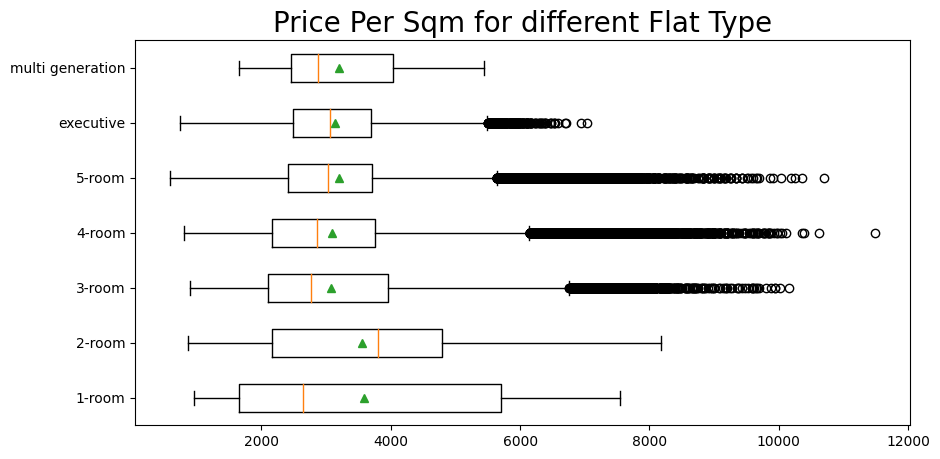

In [120]:
import matplotlib.pyplot as plt
# all_data.plot(kind='scatter', x='flat_type', y='ppsqm',s =all_data.floor_area_sqm, c='r')
box1 = all_data[all_data['flat_type'] == '1']['ppsqm']
box2 = all_data[all_data['flat_type'] == '2']['ppsqm']
box3 = all_data[all_data['flat_type'] == '3']['ppsqm']
box4 = all_data[all_data['flat_type'] == '4']['ppsqm']
box5 = all_data[all_data['flat_type'] == '5']['ppsqm']
box6 = all_data[all_data['flat_type'] == '6']['ppsqm']
box7 = all_data[all_data['flat_type'] == '7']['ppsqm']
print(box6)
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Price Per Sqm for different Flat Type',fontsize=20)#标题，并设定字号大小
labels = '1-room','2-room','3-room','4-room','5-room','executive','multi generation'  #图例
#vert=False:水平箱线图；showmeans=True：显示均值
plt.boxplot([box1, box2, box3, box4, box5, box6, box7], labels = labels, vert=False,showmeans=True )
plt.show()#显示图像

### Flat Model

In [121]:
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
0,pasir ris,4,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644
1,punggol,5,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727
2,sengkang,5,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571
3,clementi,3,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418
4,bukit batok,3,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562
...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,01 to 03,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139
431728,sengkang,4,13 to 15,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000
431729,tampines,3,01 to 03,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373
431730,sengkang,5,16 to 18,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341


<AxesSubplot: title={'center': 'Mean Price per sqm for different model'}, xlabel='flat_model'>

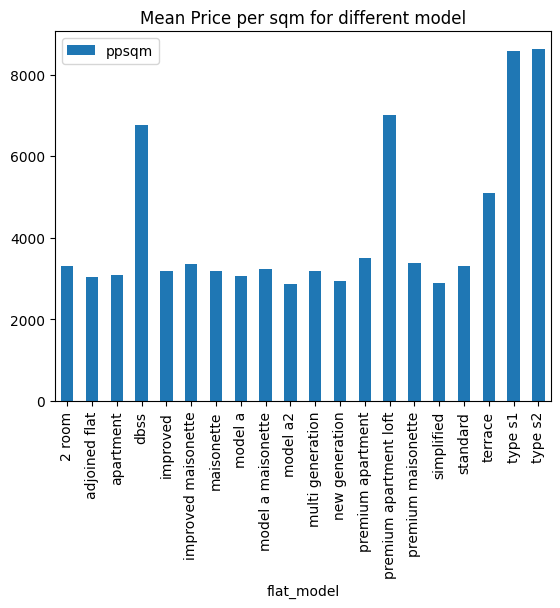

In [122]:
model = all_data.copy()
mean = model.loc[:,('flat_model','ppsqm')].groupby('flat_model').mean()
mean.plot(kind = 'bar', title='Mean Price per sqm for different model')

### storey_range

<AxesSubplot: title={'center': 'Mean Price Per Sqm for different storey_range'}, xlabel='storey_range'>

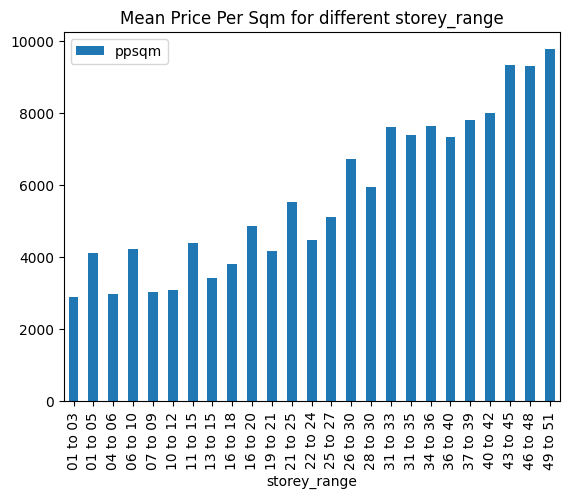

In [123]:
storey = all_data.copy()
# print(storey['storey_range'].drop_duplicates().sort_values())
s = storey[['storey_range','ppsqm']].sort_values('storey_range').groupby('storey_range').mean()
s.plot(kind='bar',title='Mean Price Per Sqm for different storey_range')

In [124]:
# storey = storey.to_numpy()
def transfer(x):
    storeys = x.split(' to ')
    return int((int(storeys[0])+int(storeys[1]))/2)
    
all_data['storey_range'] = all_data['storey_range'].apply(transfer)
test_data['storey_range'] = test_data['storey_range'].apply(transfer)
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
0,pasir ris,4,2,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644
1,punggol,5,16,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727
2,sengkang,5,2,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571
3,clementi,3,11,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418
4,bukit batok,3,11,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562
...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,2,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139
431728,sengkang,4,20,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000
431729,tampines,3,2,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373
431730,sengkang,5,25,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341


### lease_commence_date


<AxesSubplot: title={'center': 'Lease Commence Date(Min ppsqm)'}, xlabel='lease_commence_date'>

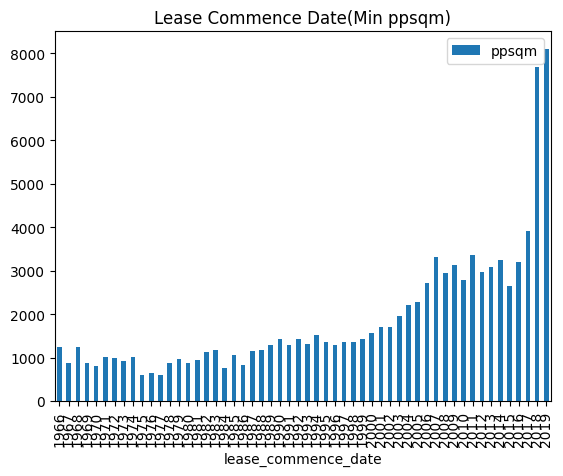

In [125]:
lease = all_data[['lease_commence_date','ppsqm']].copy()
# lease = lease[['lease_commence_date','ppsqm']]
leaseMean = lease.groupby('lease_commence_date').min()
lease
leaseMean.plot(kind='bar',title='Lease Commence Date(Min ppsqm)')


In [126]:
# print(lease['lease_commence_date'].drop_duplicates().sort_values())
# print(lease.groupby('lease_commence_date').count())
lease1975 = all_data[all_data['lease_commence_date'] == 1975].copy()
lease1975.sort_values('ppsqm').tail(20)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
407621,bukit merah,1,16,31.0,improved,1975,1.278361,103.819384,telok blangah way,214200.0,6909.677419
61557,queenstown,5,38,119.0,standard,1975,1.310976,103.792380,holland drive,828000.0,6957.983193
179961,bukit merah,1,11,31.0,improved,1975,1.278361,103.819384,telok blangah way,216000.0,6967.741935
288443,bukit merah,1,11,31.0,improved,1975,1.278361,103.819384,telok blangah way,216000.0,6967.741935
153193,bukit merah,1,7,31.0,improved,1975,1.278361,103.819384,telok blangah way,216000.0,6967.741935
186492,queenstown,3,29,65.0,improved,1975,1.309360,103.793205,holland drive,454500.0,6992.307692
187218,marine parade,4,25,88.0,improved,1975,1.303209,103.914301,marine parade,616500.0,7005.681818
411275,marine parade,5,25,122.0,standard,1975,1.304106,103.917733,marine parade,855000.0,7008.196721
258359,queenstown,5,38,114.0,standard,1975,1.310976,103.792380,holland drive,799200.0,7010.526316
204404,marine parade,5,25,120.0,standard,1975,1.305519,103.913022,marine parade,841500.0,7012.500000


## Population

In [127]:
population = pd.read_csv('./auxiliary-data/sg-population-demographics.csv')  # contains columns 'lat', 'lng'
population

,plannin_area,subzone,age_group,sex,count
0,ang mo kio,ang mo kio town centre,0-4,m,130
1,ang mo kio,cheng san,0-4,m,670
2,ang mo kio,chong boon,0-4,m,460
3,ang mo kio,kebun bahru,0-4,m,380
4,ang mo kio,sembawang hills,0-4,m,90
...,...,...,...,...,...
7831,yishun,springleaf,85+,f,30
7832,yishun,yishun central,85+,f,10
7833,yishun,yishun east,85+,f,160
7834,yishun,yishun south,85+,f,240


### Male to Femal

In [128]:
male = population[population['sex'] == 'm']
female = population[population['sex'] == 'f']
maleCount = male.groupby('subzone').sum()
femaleCount = female.groupby('subzone').sum()
maleCount['female'] = femaleCount['count']
maleCount['maleToFemale'] = maleCount['count'] / maleCount['female']
maleCount

C:\Users\Walskor\AppData\Local\Temp\ipykernel_43524\3094556789.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maleCount = male.groupby('subzone').sum()
C:\Users\Walskor\AppData\Local\Temp\ipykernel_43524\3094556789.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  femaleCount = female.groupby('subzone').sum()


,count,female,maleToFemale
subzone,,,
admiralty,7120,7290,0.976680
alexandra hill,7700,7950,0.968553
alexandra north,450,550,0.818182
aljunied,20780,20920,0.993308
anak bukit,10540,11470,0.918919
...,...,...,...
yishun south,19050,19790,0.962607
yishun west,28810,29080,0.990715
yuhua east,13510,13970,0.967072


### Age range

In [129]:
subzones = population['subzone'].drop_duplicates()
subzones = subzones.to_numpy()

In [130]:
first = ['0-4','5-9','10-14']
second = ['15-19','20-24','25-29']
third = ['30-34','35-39','40-44','45-49','50-54','55-59']
forth = ['60-64','65-69','70-74','75-79','80-84','85+']
ranges = [first,second, third, forth]
newLines = ['0-14','15-29','30-59','60+']

ageRange = population.groupby(['subzone','age_group']).sum()
ageRange = ageRange.reset_index()
ageRange.describe()

C:\Users\Walskor\AppData\Local\Temp\ipykernel_43524\3164800676.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ageRange = population.groupby(['subzone','age_group']).sum()


,count
count,3969.000000
mean,983.814563
std,1264.134626
min,10.000000
25%,160.000000
50%,540.000000
75%,1310.000000
max,12200.000000


In [131]:
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
0,pasir ris,4,2,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644
1,punggol,5,16,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727
2,sengkang,5,2,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571
3,clementi,3,11,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418
4,bukit batok,3,11,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562
...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,2,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139
431728,sengkang,4,20,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000
431729,tampines,3,2,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373
431730,sengkang,5,25,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341


In [132]:
line = 1
loop = [0,1,2,3]
myRange = {"subzone":[],"0-14":(),"15-29":(),"30-59":(),"60+":()} 

myRange = pd.DataFrame(myRange)
print(myRange)
# print(ageRange.loc[ageRange['age_group'].isin(first)]['count'].sum())
for subzone in subzones:
    myzone = ageRange[ageRange['subzone'] == subzone]
    row = list()
    row.append(subzone)
    for i in loop:
        row.append((myzone.loc[myzone['age_group'].isin(ranges[i])]['count'].sum()))
    myRange.loc[line] = row
    line += 1
myRange.head(20)


Empty DataFrame
Columns: [subzone, 0-14, 15-29, 30-59, 60+]
Index: []


,subzone,0-14,15-29,30-59,60+
1,ang mo kio town centre,870,860,2370,960
2,cheng san,3770,4820,14250,6940
3,chong boon,3190,4690,12720,7330
4,kebun bahru,2870,4110,10860,6100
5,sembawang hills,1020,1540,2790,1550
6,shangri-la,2380,3320,8360,4440
7,tagore,1150,1970,3560,1650
8,townsville,3170,3720,10820,6050
9,yio chu kang east,580,920,1800,830
10,yio chu kang west,3770,4880,12340,5600


In [133]:
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm
0,pasir ris,4,2,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644
1,punggol,5,16,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727
2,sengkang,5,2,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571
3,clementi,3,11,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418
4,bukit batok,3,11,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562
...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,2,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139
431728,sengkang,4,20,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000
431729,tampines,3,2,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373
431730,sengkang,5,25,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341


In [134]:
maleToFemale = maleCount.reset_index()
maleToFemale = maleToFemale[['subzone','maleToFemale']]
all_data = pd.merge(all_data, maleToFemale, how='left', on=['subzone'])
all_data = pd.merge(all_data, myRange, how='left', on=['subzone'])
# all_data = all_data.merge(maleToFemale,how='outer')
# all_data = all_data.merge(myRange,how='outer')
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm,maleToFemale,0-14,15-29,30-59,60+
0,pasir ris,4,2,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644,0.984990,8730.0,15740.0,26840.0,8200.0
1,punggol,5,16,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727,0.968622,10010.0,6430.0,21860.0,4990.0
2,sengkang,5,2,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571,0.975042,8710.0,5360.0,17780.0,3760.0
3,clementi,3,11,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418,0.883432,3390.0,4510.0,13040.0,7820.0
4,bukit batok,3,11,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562,0.965206,2230.0,3110.0,7170.0,2740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,2,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139,1.005036,7410.0,7570.0,16960.0,3890.0
431728,sengkang,4,20,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000,0.975042,8710.0,5360.0,17780.0,3760.0
431729,tampines,3,2,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373,0.977480,11540.0,18060.0,35750.0,12800.0
431730,sengkang,5,25,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341,0.970112,10280.0,10680.0,27150.0,6600.0


In [135]:
all_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,resale_price,ppsqm,maleToFemale,0-14,15-29,30-59,60+
0,pasir ris,4,2,118.0,model a,1989,1.369008,103.958697,pasir ris drive,209700.0,1777.118644,0.984990,8730.0,15740.0,26840.0,8200.0
1,punggol,5,16,110.0,improved,2003,1.399007,103.906991,punggol field,402300.0,3657.272727,0.968622,10010.0,6430.0,21860.0,4990.0
2,sengkang,5,2,112.0,premium apartment,2004,1.388348,103.873815,fernvale,351000.0,3133.928571,0.975042,8710.0,5360.0,17780.0,3760.0
3,clementi,3,11,67.0,new generation,1980,1.318493,103.766702,clementi north,151200.0,2256.716418,0.883432,3390.0,4510.0,13040.0,7820.0
4,bukit batok,3,11,73.0,model a,1985,1.348149,103.742658,bukit batok west,318600.0,4364.383562,0.965206,2230.0,3110.0,7170.0,2740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,woodlands,4,2,101.0,model a,2000,1.429658,103.792583,woodlands south,238500.0,2361.386139,1.005036,7410.0,7570.0,16960.0,3890.0
431728,sengkang,4,20,95.0,premium apartment,2012,1.390053,103.875941,fernvale,376200.0,3960.000000,0.975042,8710.0,5360.0,17780.0,3760.0
431729,tampines,3,2,67.0,new generation,1986,1.349224,103.934913,tampines west,255600.0,3814.925373,0.977480,11540.0,18060.0,35750.0,12800.0
431730,sengkang,5,25,123.0,improved,1999,1.389941,103.900721,sengkang town centre,508500.0,4134.146341,0.970112,10280.0,10680.0,27150.0,6600.0


In [136]:

test_data = pd.merge(test_data, maleToFemale, how='left', on=['subzone'])
test_data = pd.merge(test_data, myRange, how='left', on=['subzone'])
myRange.to_csv('AgeInfo.csv',index=False)
all_data.to_csv('WithAge.csv', index=False)
test_data.to_csv('TestWithAge.csv', index=False)

In [137]:
subzone = population.groupby('subzone').sum()
subzone

C:\Users\Walskor\AppData\Local\Temp\ipykernel_43524\3474833522.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subzone = population.groupby('subzone').sum()


,count
subzone,
admiralty,14410
alexandra hill,15650
alexandra north,1000
aljunied,41700
anak bukit,22010
...,...
yishun south,38840
yishun west,57890
yuhua east,27480


## Predict

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor  # Import LightGBM's LGBMRegressor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer()),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
    ])

# Split the dataset into training and testing sets
X = all_data.drop('resale_price', axis=1)
y = all_data['resale_price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=5000, random_state=42))
])

# Define parameter grid
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'constant'],
    # 'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    # 'preprocessor__cat__encoder__drop': ['first', None], 
    # 'regressor__learning_rate': [  0.1],
    # 'regressor__n_estimators': [5000 ],
    # 'regressor__max_depth': [-1, 3, 5, 7],
    # 'regressor__num_leaves': [31, 63 ],
    # 'regressor__min_child_samples': [5, 10, 20, 50],
    # 'regressor__subsample': [0.8, 0.9, 1.0],
    # 'regressor__colsample_bytree': [0.8, 0.9, 1.0],
}
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Make predictions and evaluate the model
y_pred = grid_search.predict(X)
rmse = np.sqrt(mean_squared_error(y_pred, y))
print(f'Root Mean Squared Error: {rmse:.2f}')

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pickle
# Save the trained pipeline to a file
with open("LGB5000_pipeline_GS1km.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [ ]:
import pandas as pd
all_data2 = pd.read_csv('/content/drive/MyDrive/CS5228/project/testhouses_with_distances.csv', parse_dates=['month'])
 
# convert stoery to int 
all_data2['flat_type'] = all_data2['flat_type'].apply(lambda x: x[0]+" room" if x[0] in ['1 room','2 room','3 room','4 room','5 room'] else x) 

# add remaining_lease_new
all_data2['lease_remaining'] = 99 - (all_data2['month'].apply(lambda x: x.year) - all_data2['lease_commence_date'])
all_data2['month'] = pd.to_datetime(all_data2['month'], format='%d/%m/%Y')
all_data2['year'] = all_data2['month'].dt.year
all_data2['month'] = all_data2['month'].dt.month 
all_data2 = all_data2.drop(['block', 'street_name','eco_category'], axis=1) 
all_data2

In [ ]:
yp = pipeline.predict(all_data2)
predicted_resale_prices =  yp
housing_ids = np.arange(0, len(predicted_resale_prices) )  # Replace this with your actual housing IDs if available
predicted_prices_df = pd.DataFrame({'Id': housing_ids, 'Predicted': predicted_resale_prices})
predicted_prices_df.to_csv('predicted_prices_Apr1_0test.csv', index=False)